# 連接 Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive

/content/drive/MyDrive


# 建立資料集

In [3]:
%cd Yolact_training

/content/drive/MyDrive/Yolact_training


In [ ]:
! git clone https://github.com/wkentaro/labelme

Cloning into 'labelme'...
remote: Enumerating objects: 7341, done.
remote: Counting objects: 100% (299/299), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 7341 (delta 173), reused 188 (delta 103), pack-reused 7042
Receiving objects: 100% (7341/7341), 45.09 MiB | 11.96 MiB/s, done.
Resolving deltas: 100% (4399/4399), done.
Checking out files: 100% (254/254), done.


In [ ]:
! pip install labelme

     |████████████████████████████████| 1.5 MB 12.4 MB/s 
     |████████████████████████████████| 7.7 MB 10.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 8.3 MB 16.2 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 
     |████████████████████████████████| 317 kB 34.9 MB/s 
  Created wheel for labelme: filename=labelme-4.6.0-py3-none-any.whl size=1467912 sha256=1f5397c942ab207a57adfcb6565f31ae1f84d098ce0e42686449f39d6d598329
  Stored in directory: /root/.cache/pip/wheels/46/1a/79/e007034a84d500e3448855b2c873c678aa82fb8613c3b9e3e8
  Created wheel for imgviz: filename=imgviz-1.4.1-py3-none-any.whl size=7675638 sha256=84613c0d83b96086ca279fd9c365f7dbfbf5ec52d2abd5f824f8f55f16688d59
  Stored in directory: /root/.cache/pip/wheels/68/e0/5b/79173d44bc577e536f83304237f80b60cf04e9ac8e40017066
Successf

In [7]:
%cd labelme/examples/instance_segmentation

/content/drive/My Drive/Yolact_training/labelme/examples/instance_segmentation


In [8]:
import gdown

In [9]:
! gdown --id 1ivRtpdIOs3VG0j_IEtroUJG8qsoeBk-Z -O "raccoon_dataset.zip"

Downloading...
From: https://drive.google.com/uc?id=1ivRtpdIOs3VG0j_IEtroUJG8qsoeBk-Z
To: /content/drive/My Drive/Yolact_training/labelme/examples/instance_segmentation/raccoon_dataset.zip
100% 3.95M/3.95M [00:00<00:00, 14.9MB/s]


In [ ]:
! unzip raccoon_dataset.zip

In [ ]:
! mkdir my_dataset

In [ ]:
# 轉換 train data
! python labelme2coco.py raccoon_dataset/train_data my_dataset/train --labels raccoon_dataset/label.txt

In [ ]:
# 轉換 valid data
! python labelme2coco.py raccoon_dataset/valid_data my_dataset/valid --labels raccoon_dataset/label.txt

Creating dataset: my_dataset/valid
Generating dataset from: raccoon_dataset/valid_data/41.json
Generating dataset from: raccoon_dataset/valid_data/42.json
Generating dataset from: raccoon_dataset/valid_data/43.json
Generating dataset from: raccoon_dataset/valid_data/44.json
Generating dataset from: raccoon_dataset/valid_data/45.json
Generating dataset from: raccoon_dataset/valid_data/46.json
Generating dataset from: raccoon_dataset/valid_data/47.json
Generating dataset from: raccoon_dataset/valid_data/48.json
Generating dataset from: raccoon_dataset/valid_data/49.json
Generating dataset from: raccoon_dataset/valid_data/50.json


# 安裝需要套件

In [ ]:
! pip install cython
! pip install opencv-python pillow pycocotools matplotlib

# Yolact

In [10]:
%cd /content/drive/MyDrive/Yolact_training

/content/drive/MyDrive/Yolact_training


In [12]:
! git clone https://github.com/dbolya/yolact.git

Cloning into 'yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.21 MiB | 11.28 MiB/s, done.
Resolving deltas: 100% (2001/2001), done.


In [13]:
%cd yolact

/content/drive/My Drive/Yolact_training/yolact


In [ ]:
# 將剛剛轉換完的資料集移至 yolact/data 資料夾
! mv ../labelme/examples/instance_segmentation/my_dataset ./data

In [14]:
! mkdir weights

In [15]:
# 下載 pretrained weights 並放入 weights 資料夾
! gdown --id 1Jy3yCdbatgXa5YYIdTCRrSV0S9V5g1rn -O "weights/resnet50-19c8e357.pth"

Downloading...
From: https://drive.google.com/uc?id=1Jy3yCdbatgXa5YYIdTCRrSV0S9V5g1rn
To: /content/drive/My Drive/Yolact_training/yolact/weights/resnet50-19c8e357.pth
100% 103M/103M [00:04<00:00, 24.2MB/s] 


# 修改 data/config.py

更改第 108 行 dataset_base = Config

In [ ]:
# 更改第 108 行 dataset_base = Config({
# 'name': 'My Dataset', (也可不改)
# 'train_images': './data/my_dataset/train',
# 'train_info': './data/my_dataset/train/annotations.json',
# 'valid_images': './data/my_dataset/valid',
# 'valid_info': './data/my_dataset/valid/annotations.json',
# 'has_gt': True,
# 'class_names': ('raccoon'),
# 'label_map': {1:1}  # 因為類別只有一個 (raccoon)，因此 label_map 為 {1:1}
# }]

In [16]:
! sed -n -e 112p ./data/config.py
! sed -n -e 113p ./data/config.py
! sed -n -e 116p ./data/config.py
! sed -n -e 117p ./data/config.py
! sed -n -e 123p ./data/config.py
! sed -n -e 128p ./data/config.py

    'train_images': './data/coco/images/',
    'train_info':   'path_to_annotation_file',
    'valid_images': './data/coco/images/',
    'valid_info':   'path_to_annotation_file',
    'class_names': COCO_CLASSES,
    'label_map': None


In [17]:
! sed -i "112s#./data/coco/images/#./data/my_dataset/train#g" ./data/config.py
! sed -i "113s#path_to_annotation_file#./data/my_dataset/train/annotations.json#g" ./data/config.py
! sed -i "116s#./data/coco/images/#./data/my_dataset/valid#g" ./data/config.py
! sed -i "117s#path_to_annotation_file#./data/my_dataset/valid/annotations.json#g" ./data/config.py
! sed -i "123s#COCO_CLASSES#('raccoon')#g" ./data/config.py
! sed -i "128s#None#{1:1}#g" ./data/config.py

In [18]:
! sed -n -e 112p ./data/config.py
! sed -n -e 113p ./data/config.py
! sed -n -e 116p ./data/config.py
! sed -n -e 117p ./data/config.py
! sed -n -e 123p ./data/config.py
! sed -n -e 128p ./data/config.py

    'train_images': './data/my_dataset/train',
    'train_info':   './data/my_dataset/train/annotations.json',
    'valid_images': './data/my_dataset/valid',
    'valid_info':   './data/my_dataset/valid/annotations.json',
    'class_names': ('raccoon'),
    'label_map': {1:1}


更改第 656 行 yolact_base_config = coco_base_config()

In [ ]:
# 將 dataset 改為剛剛設定的 dataset 名稱、num_classes 改為 background + 類別數
# backbone 改為 resnet50_backbone

# 'dataset': dataset_base, (若沒更改dataset_base = Config()名稱)
# 'num_classes': 2,
# 'backbone': resnet50_backbone.copy({...})

In [ ]:
! sed -i "660s/coco2017_dataset/dataset_base/g" ./data/config.py
! sed -i "661s/len(coco2017_dataset.class_names) + 1/2/g" ./data/config.py
! sed -i "671s/resnet101_backbone/resnet50_backbone/g" ./data/config.py

In [ ]:
! sed -n -e 660p ./data/config.py
! sed -n -e 661p ./data/config.py
! sed -n -e 671p ./data/config.py

    'dataset': dataset_base,
    'num_classes': 2,
    'backbone': resnet50_backbone.copy({


也可以修改其他超參數

In [ ]:
# 'lr_steps': (35, 75, 88, 94)
# 'max_iter'：100

In [ ]:
! sed -i "667s/(280000, 600000, 700000, 750000)/(35, 75, 88, 94)/g" ./data/config.py
! sed -i "668s/800000/100/g" ./data/config.py

In [ ]:
! sed -n -e 667p ./data/config.py
! sed -n -e 668p ./data/config.py

    'lr_steps': (35, 75, 88, 94),
    'max_iter': 100,


# 訓練模型

更改 train.py 第 249 行 data_loader = data.DataLoader() 裡 shuffle=False

In [ ]:
! sed -i "251s/True/False/g" ./train.py

In [ ]:
! sed -n -e 251p ./train.py

                                  shuffle=False, collate_fn=detection_collate,


進行訓練

In [ ]:
! python train.py --config=yolact_base_config --save_interval=5

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Initializing weights...
/usr

# 測試模型

訓練好的模型會放在 weights 資料夾中

In [ ]:
! python eval.py --trained_model=weights/yolact_base_19_100.pth --score_threshold=0.3 --top_k=100 --image=../test.jpg:output_image.png

Config not specified. Parsed yolact_base_config from the file name.

/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loading model... Done.


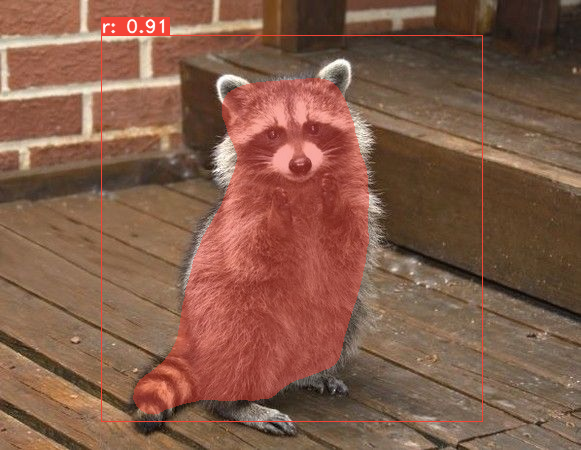

In [ ]:
from PIL import Image
Image.open('output_image.png')